<a href="https://colab.research.google.com/github/vmcarranzam/Proyecto_RL_CDP/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Regresión Lineal con Python

##Importación de librerías

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sns
from sklearn.linear_model import LinearRegression as Lin_reg
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Carga de datos

In [5]:
data=np.load("/content/drive/MyDrive/Colab Notebooks/Proyecto Ciencia de Datos/proyecto_training_data.npy")
df=pd.DataFrame(data, columns=["SalePrice","OverallQual","FirstFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"])
df

,SalePrice,OverallQual,FirstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


##Exploración de datos

###Calculando la media de cada variable

In [6]:
df.mean()

SalePrice       180921.195890
OverallQual          6.099315
FirstFlrSF        1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64

###Calculando valores mínimos, máximos y rango de cada variable

In [7]:
df.min()

SalePrice       34900.0
OverallQual         1.0
FirstFlrSF        334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

In [8]:
df.max()

SalePrice       755000.0
OverallQual         10.0
FirstFlrSF        4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

In [9]:
rango=(df.max())-df.min()
rango

SalePrice       720100.0
OverallQual          9.0
FirstFlrSF        4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

###Calculando la desviación estándar de cada variable

In [10]:
df.std()

SalePrice       79442.502883
OverallQual         1.382997
FirstFlrSF        386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64

##Definición de la clase

In [33]:
class RegresionLineal:
    
    def __init__(self, x_col, y_col, epochs, learning_rate, print_every,  df):
        self.x_col = x_col
        self.y_col = y_col
        self.x = np.array(df[x_col])
        self.y = np.array(df[y_col])
        self.epochs = epochs
        self.lr = learning_rate
        self.print_every = print_every
        self.df = df
        self.train_x, self.test_x, self.train_y, self.test_y = self.split_data()
        self.mse = {}

 #Método para dividir el dataset   
    def split_data(self):
        idx = int(len(self.x) * 0.8)
        train_x = self.x[:idx]
        test_x = self.x[idx:]
        train_y = self.y[:idx]
        test_y = self.y[idx:]
        return train_x, test_x, train_y, test_y
        
    
    def perform_linear_regression(self):
        b0, b1 = 0, 0
        n = len(self.train_x)
        for i in range(self.epochs):
            y_pred = b0 + b1 * self.train_x
            error = y_pred - self.train_y
            b0 -= self.lr * (1/n) * error.sum()
            b1 -= self.lr * (1/n) * (error * self.train_x).sum()
            if (i+1) % self.print_every == 0:
                self.mse[i+1] = {'b0': b0, 'b1': b1, 'y_pred': y_pred, 'mse': np.mean(error**2)}

#Método para realizar regresión lineal y gradiente descendiente    
    def perform_vectorized_linear_regression(self):
        b0, b1 = 0, 0
        n = len(self.train_x)
        for i in range(self.epochs):
            y_pred = b0 + b1 * self.train_x
            error = y_pred - self.train_y
            b0 -= self.lr * (1/n) * error.sum()
            b1 -= self.lr * (1/n) * np.dot(error, self.train_x)
            self.mse[i+1] = {'b0': b0, 'b1': b1, 'y_pred': y_pred, 'mse': np.mean(error**2)}
            if (i+1) % self.print_every == 0:
                print("Epoch: {}, MSE: {}".format(i+1, self.mse[i+1]["mse"]))

#Método para graficar MSE vs Epoch
    def plot_mse(self):
        plt.clf()
        epochs = list(self.mse.keys())
        mse = [self.mse[i]['mse'] for i in epochs]
        plt.plot(epochs, mse)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE vs Epoch')
        plt.show()
    

#Método para graficar histogramas de las variables independientes
    def plot_histograms(self):
        sns.set_style("darkgrid")
        for column in df:
          plt.clf()
          col = (np.random.random(), np.random.random(), np.random.random())
          plt.figure()
          sns.histplot(df[column], kde = True, color = col, linewidth = 1, edgecolor ="0")
          plt.show()

#Método para graficar la línea producida por el modelo con menor error    
    def plot_best_fit_line(self):
        plt.clf()
        best_epoch = min(self.mse, key=lambda x: self.mse[x]['mse'])
        b0 = self.mse[best_epoch]['b0']
        b1 = self.mse[best_epoch]['b1']
        y_pred = b0 + b1 * self.x
        plt.scatter(self.x, self.y)
        plt.plot(self.x, y_pred, color='red')
        plt.xlabel(self.x_col)
        plt.ylabel(self.y_col)
        plt.title('Línea del mejor modelo')
        plt.show()

#Método para graficar la evolución del modelo mientras se entrena
    def plot_evolution(self, n):
        plt.clf()
        plt.scatter(self.x, self.y)
        for i in range(1, self.epochs+1, n):
            if i in self.mse:
                b0 = self.mse[i]['b0']
                b1 = self.mse[i]['b1']
                y_pred = b0 + b1 * self.x
                plt.plot(self.x, y_pred, label=f'Epoch {i}')
        plt.xlabel(self.x_col)
        plt.ylabel(self.y_col)
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

#Método para comparar realizando un modelo con Scikit-Learn
    def compare_with_sklearn(self):
        l_r = Lin_reg()
        l_r.fit(self.train_x.reshape(-1, 1), self.train_y)
        y_pred = l_r.predict(self.x.reshape(-1, 1))
        plt.scatter(self.x, self.y)
        plt.plot(self.x, y_pred, color='red')
        plt.xlabel(self.x_col)
        plt.ylabel(self.y_col)
        plt.title('Comparison with scikit-learn')
        plt.show()



#Método para graficar scatterplots de cada variable independiente junto a su coeficiente de correlación con la dependiente
    def plot_scatters(self):
        dataframe = self.df
        cols = list(dataframe.columns)
        cols.remove(self.y_col)
        for col in cols:
            plt.scatter(self.df[col], self.y)
            corr = np.corrcoef(self.df[col], self.y)[0][1]
            plt.title(f"{col} vs {self.y_col} (Correlation: {corr:.2f})")
            plt.xlabel(col)
            plt.ylabel(self.y_col)
            plt.show()

#Método para graficar la comparación de modelos y obtener los parámetros del modelo manual y del generado por Scikit-Learn
    def mean_model(self):
        best_epoch_vectorized = min(self.mse, key=lambda x: self.mse[x]['mse'])
        b0_vectorized = self.mse[best_epoch_vectorized]['b0']
        b1_vectorized = self.mse[best_epoch_vectorized]['b1']
        mse_vectorized = self.mse[best_epoch_vectorized]['mse']
    
        l_r = Lin_reg()
        l_r.fit(self.train_x.reshape(-1, 1), self.train_y)
        y_pred_sklearn = l_r.predict(self.x.reshape(-1, 1))
        b1_sklearn, b0_sklearn = l_r.coef_[0], l_r.intercept_

        b0_mean = (b0_vectorized + b0_sklearn) / 2
        b1_mean = (b1_vectorized + b1_sklearn) / 2

        plt.scatter(self.x, self.y)
        plt.plot(self.x, b0_vectorized + b1_vectorized*self.x, color='red', label='Modelo manual')
        plt.plot(self.x, y_pred_sklearn, color='green', label='Modelo scikit-learn')
        plt.plot(self.x, b0_mean + b1_mean*self.x, color='blue', label='Modelo Promedio')
        plt.xlabel(self.x_col)
        plt.ylabel(self.y_col)
        plt.title('Comparación de modelos')
        plt.legend()
        plt.show()

        return {'Modelo manual': {'b0': b0_vectorized, 'b1': b1_vectorized, 'mse': mse_vectorized},
            'Modelo scikit-learn': {'b0': b0_sklearn, 'b1': b1_sklearn},
            'Modelo promedio': {'b0': b0_mean, 'b1': b1_mean}}


#Método para validación de los modelos
    def validation(self):
        best_models = self.mean_model()
        plt.clf()
        plt.title("Model Validation")
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        for model_name, (b0, b1, mse) in best_models.items():
            y_pred = np.float(b0) + np.float(b1) * self.test_x
            error = y_pred - self.test_y
            mse_test = np.mean(error**2)
            plt.plot(self.mse.keys(), [self.mse[k]['mse'] for k in self.mse], label=f"{model_name} (train)")
            plt.plot(self.mse.keys(), [mse_test]*len(self.mse), '--', label=f"{model_name} (test)")
        plt.legend()
        plt.show()

##Parametrizando los modelos con las variables elegidas

In [34]:
lr_overall = RegresionLineal(x_col="OverallQual", y_col="SalePrice", epochs=1000, learning_rate=0.001, print_every=100, df=df)
lr_1st = RegresionLineal(x_col="FirstFlrSF", y_col="SalePrice", epochs=1000, learning_rate=0.0000001, print_every=100, df=df)


##Histogramas de todas las variables independientes

<Figure size 640x480 with 0 Axes>

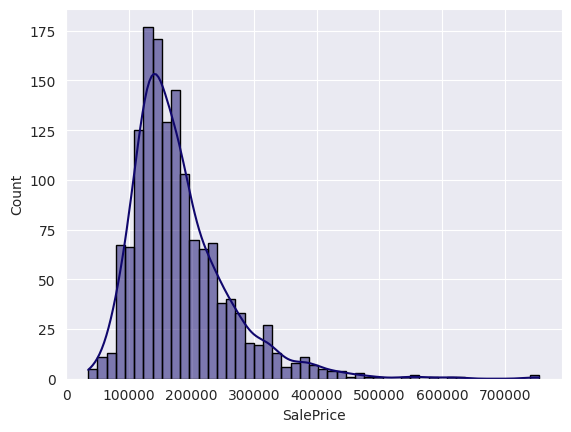

<Figure size 640x480 with 0 Axes>

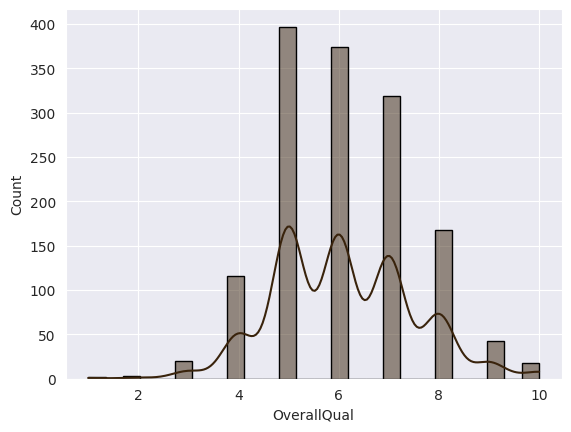

<Figure size 640x480 with 0 Axes>

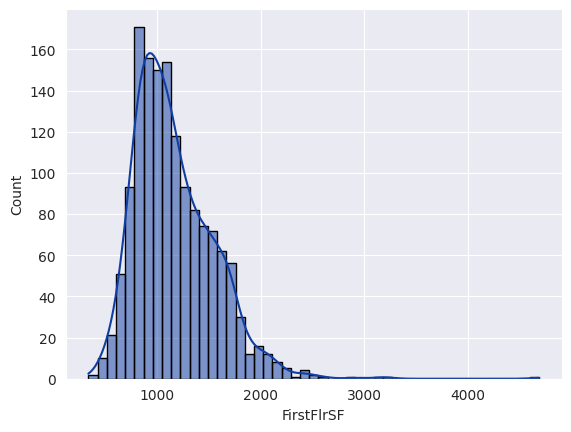

<Figure size 640x480 with 0 Axes>

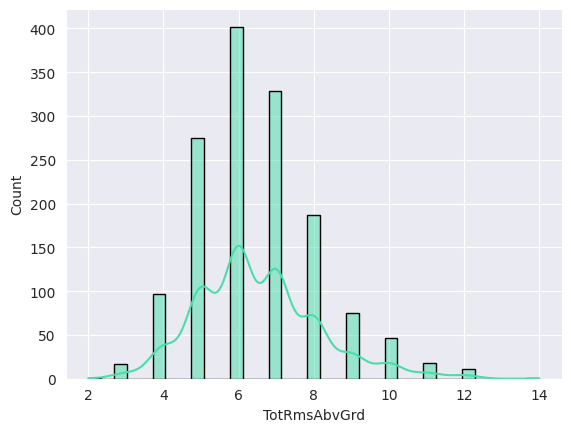

<Figure size 640x480 with 0 Axes>

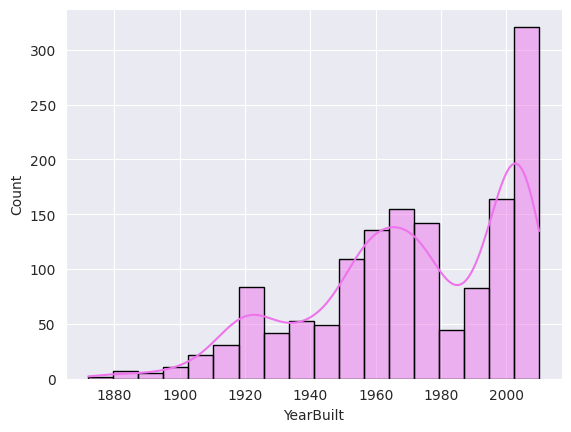

<Figure size 640x480 with 0 Axes>

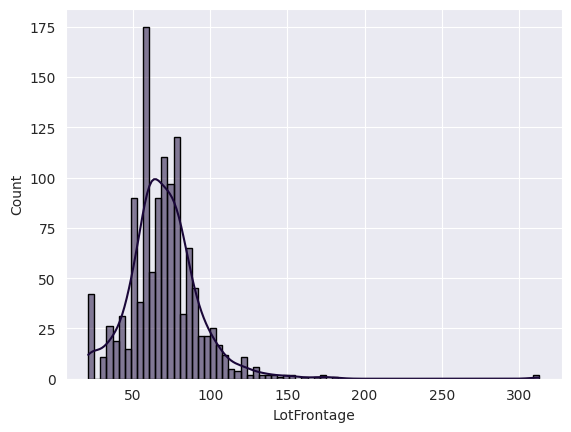

In [35]:
lr_overall.plot_histograms()

##Scatterplots de todas las variables independientes con coeficiente de correlación

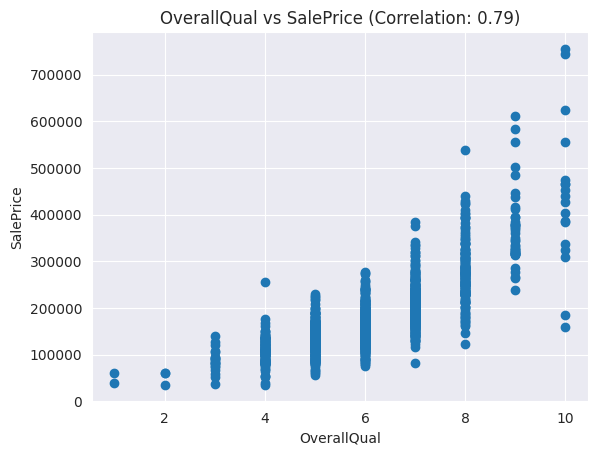

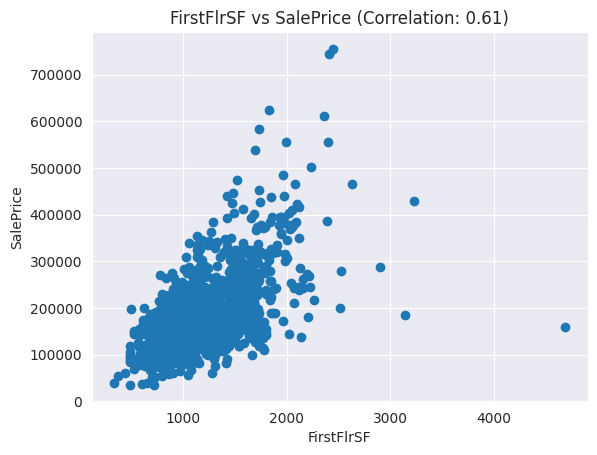

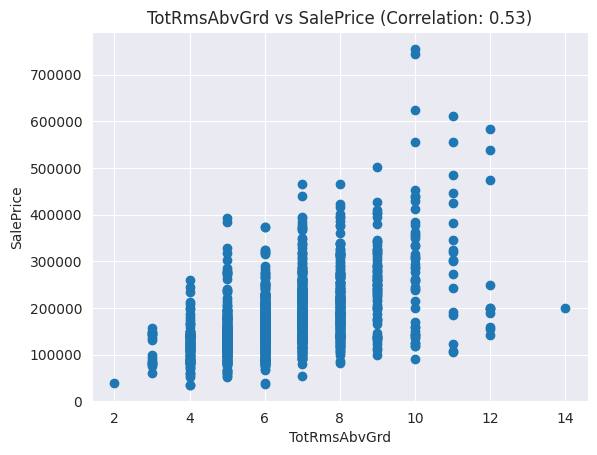

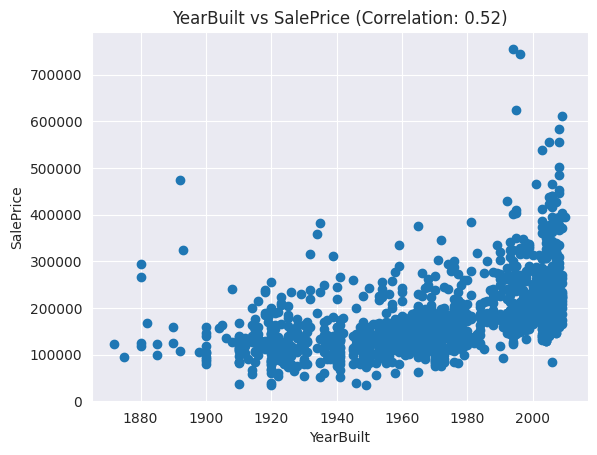

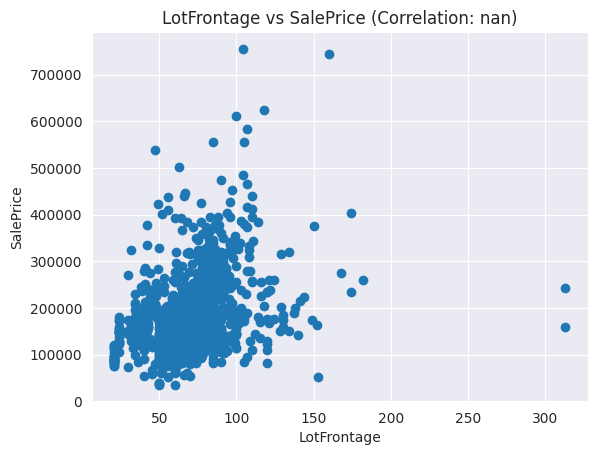

In [41]:
lr_overall.plot_scatters()

##Entrenando los modelos

###Con OverallQual como predictor

In [36]:
lr_overall.perform_vectorized_linear_regression()


Epoch: 100, MSE: 2795872109.636188
Epoch: 200, MSE: 2780285231.2075825
Epoch: 300, MSE: 2775697370.8696895
Epoch: 400, MSE: 2771155793.3945804
Epoch: 500, MSE: 2766657021.1366405
Epoch: 600, MSE: 2762200649.804095
Epoch: 700, MSE: 2757786279.768013
Epoch: 800, MSE: 2753413515.166207
Epoch: 900, MSE: 2749081963.8674917
Epoch: 1000, MSE: 2744791237.436517


####Evolución del modelo

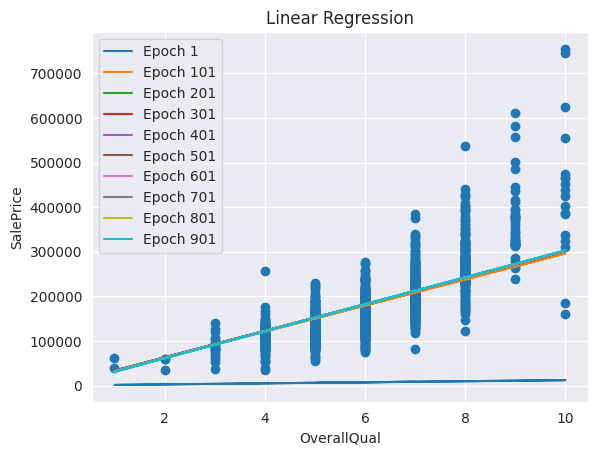

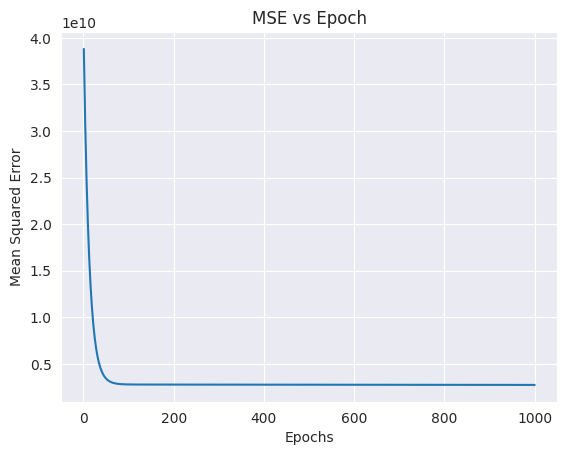

In [39]:
lr_overall.plot_evolution(100)
lr_overall.plot_mse()

####Mejor modelo obtenido

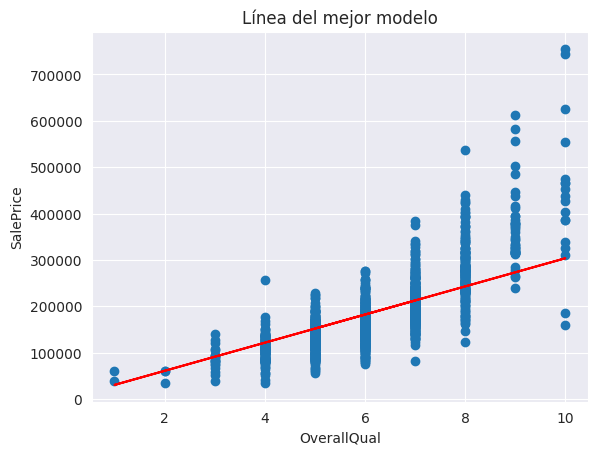

In [40]:
lr_overall.plot_best_fit_line()

###Con FirstFlrSF como predictor

In [42]:
lr_1st.perform_vectorized_linear_regression()


Epoch: 100, MSE: 3936186010.5113816
Epoch: 200, MSE: 3936185846.162118
Epoch: 300, MSE: 3936185681.813801
Epoch: 400, MSE: 3936185517.465795
Epoch: 500, MSE: 3936185353.1180987
Epoch: 600, MSE: 3936185188.7707133
Epoch: 700, MSE: 3936185024.42364
Epoch: 800, MSE: 3936184860.0768757
Epoch: 900, MSE: 3936184695.730423
Epoch: 1000, MSE: 3936184531.3842807


####Evolución del modelo

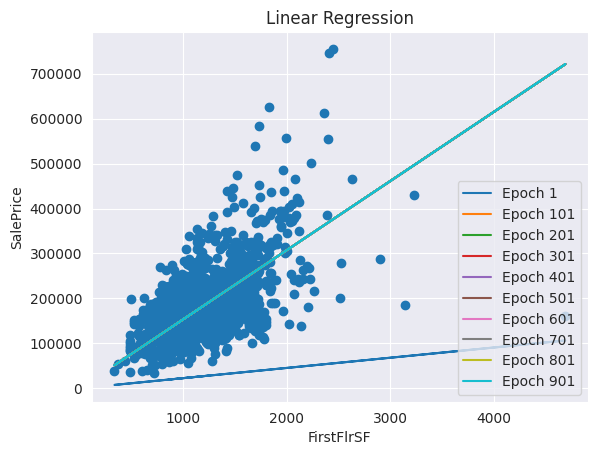

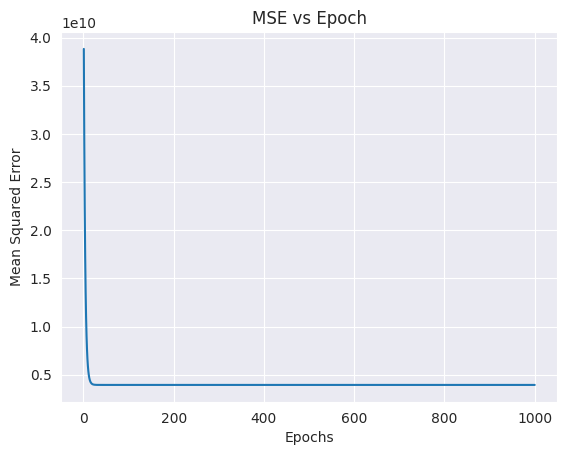

In [43]:
lr_1st.plot_evolution(100)
lr_1st.plot_mse()

###Mejor modelo obtenido

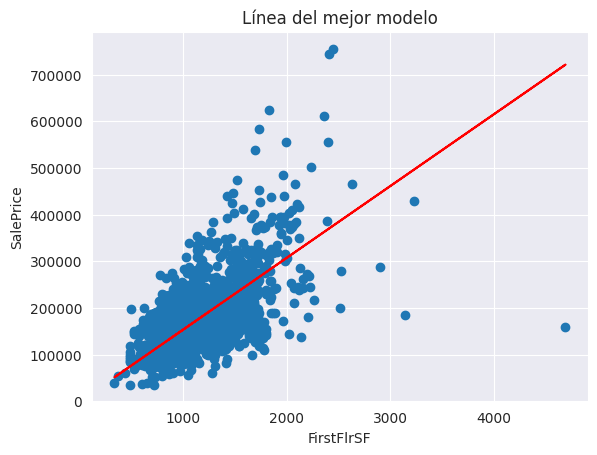

In [44]:
lr_1st.plot_best_fit_line()

##Comparación de modelos 

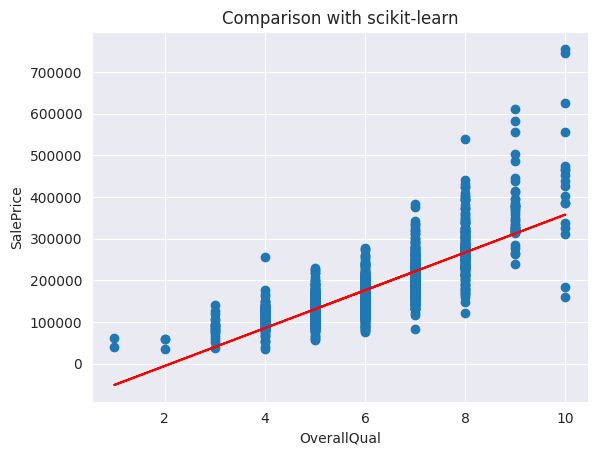

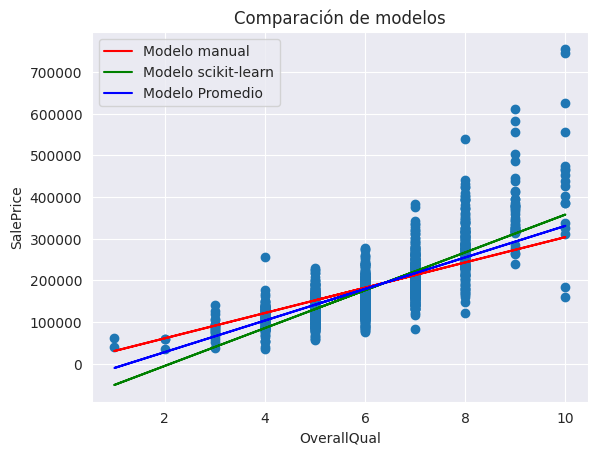

{'Modelo manual': {'b0': -49.13299531458041,
  'b1': 30356.307432374786,
  'mse': 2744791237.436517},
 'Modelo scikit-learn': {'b0': -96469.57131873982, 'b1': 45411.998779159156},
 'Modelo promedio': {'b0': -48259.3521570272, 'b1': 37884.15310576697}}

In [47]:
lr_overall.compare_with_sklearn()
lr_overall.mean_model()

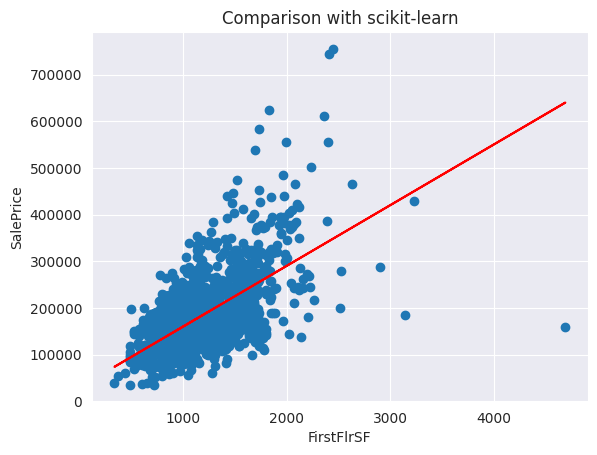

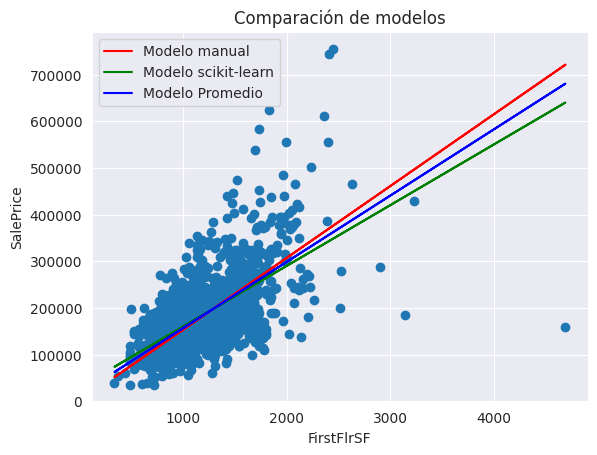

{'Modelo manual': {'b0': 0.4070133407490854,
  'b1': 153.6968400950935,
  'mse': 3936184531.3842807},
 'Modelo scikit-learn': {'b0': 30324.585174963722, 'b1': 129.9512422871571},
 'Modelo promedio': {'b0': 15162.496094152235, 'b1': 141.8240411911253}}

In [48]:
lr_1st.compare_with_sklearn()
lr_1st.mean_model()